In [7]:
!pip uninstall torch
!pip install torch==1.9.0+cpu torchvision==0.10.0+cpu torchaudio===0.9.0 -f https://download.pytorch.org/whl/cpu/torch_stable.html


^C
Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html


ERROR: Could not find a version that satisfies the requirement torch==1.9.0+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.12.0, 1.12.0+cpu, 1.12.1, 1.12.1+cpu, 1.13.0, 1.13.0+cpu, 1.13.1, 1.13.1+cpu, 2.0.0, 2.0.0+cpu, 2.0.1, 2.0.1+cpu)
ERROR: No matching distribution found for torch==1.9.0+cpu


In [37]:
import numpy as np
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

In [2]:
X = np.array([[2,3],[4,3]])
X

array([[2, 3],
       [4, 3]])

In [3]:
np.linalg.det(X)

-6.0

In [4]:
X = torch.tensor([[2,3],[4,3.]])

In [5]:
torch.det(X)

RuntimeError: Calling torch.linalg.lu_factor on a CPU tensor requires compiling PyTorch with LAPACK. Please use PyTorch built with LAPACK support.

In [9]:
X = np.array([[2,3,4],[4,3,3],[5,6,7]])
X

array([[2, 3, 4],
       [4, 3, 3],
       [5, 6, 7]])

In [10]:
np.linalg.det(X)

2.9999999999999996

In [11]:
X = np.array([[1,2,4],[2,-1,3],[0,5,1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [12]:
np.linalg.det(X)

19.999999999999996

### Relationship between eigenvalues and determinant of a martix

In [13]:
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [29]:
det_X = np.linalg.det(X)
det_X

19.999999999999996

In [24]:
lambdas, v = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [27]:
np.prod(lambdas)

19.99999999999999

In [30]:
det_X == np.prod(lambdas)   # rounding error 

False

In [31]:
B = np.array([[1,0],[0,1]])
B

array([[1, 0],
       [0, 1]])

In [32]:
# convert a matrix into a 1-dimensional vector

def vectorfy (mtrx,clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [33]:
vectorfy(B,0)

array([1, 0])

In [38]:
def plot_vectors(vectors, colors=None, xlim=None, ylim=None):
    """
    Plot multiple vectors on a graph.

    Parameters:
        vectors (list): List of vectors to plot.
        colors (list): List of colors for each vector (optional).
        xlim (tuple): Tuple containing (xmin, xmax) for x-axis limits.
        ylim (tuple): Tuple containing (ymin, ymax) for y-axis limits.
    """
    plt.figure(figsize=(4, 4))
    
    for i, vector in enumerate(vectors):
        if colors is None:
            plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, label=f'Vector {i+1}')
        else:
            plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=colors[i], label=f'Vector {i+1}')
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.title('Vector Plot')
    plt.show()

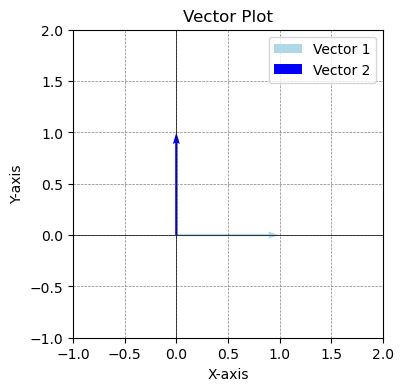

In [40]:
plot_vectors([vectorfy(B,0),vectorfy(B,1)],['lightblue','blue'],xlim = (-1,2), ylim = (-1,2))

In [45]:
N = np.array([[2,-8],[1,-4]])
N

array([[ 2, -8],
       [ 1, -4]])

In [53]:
np.abs(np.linalg.det(N))

0.0

In [47]:
NB = np.dot(N,B)
NB

array([[ 2, -8],
       [ 1, -4]])

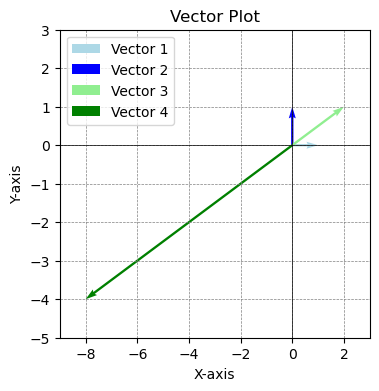

In [50]:
plot_vectors([vectorfy(B,0),vectorfy(B,1),vectorfy(NB,0),vectorfy(NB,1)],['lightblue','blue','lightgreen','green'],xlim = (-9,3), ylim = (-5,3))

In [52]:
lambdas, EN = np.linalg.eig(N)
lambdas

array([ 0., -2.])

In [55]:
J = np.array([[-0.5,0],[0,2]])

In [57]:
np.linalg.det(J)

-1.0

In [58]:
np.abs(np.linalg.det(J))

1.0

In [59]:
JB = np.dot(J,B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

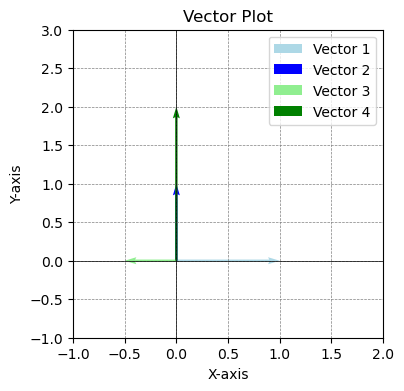

In [62]:
plot_vectors([vectorfy(B,0),vectorfy(B,1),vectorfy(JB,0),vectorfy(JB,1)],['lightblue','blue','lightgreen','green'],xlim = (-1,2), ylim = (-1,3))

In [63]:
lamb , v = np.linalg.eig(JB)
lamb

array([-0.5,  2. ])